In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1. Generate a toy dataset

To keep this practice as simple as possible so that we focus on Logistic Regression's basic idea only, we generate our own toy dataset. Following StatQuest's case (https://youtu.be/yIYKR4sgzI8), we also use weight as explanatory variable `X` and obese as response variable `y`

In [2]:
df = pd.DataFrame({'weight':[78, 98, 45, 94, 123, 65, 43, 39, 102, 87, 140, 56, 58, 49, 86, 91, 66, 67, 68, 79, 91, 82],
                   'obese': [ 0,  1,  0,  1,   1,  0,  0,  0,   1,  0,   1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1]})
df

,weight,obese
0,78,0
1,98,1
2,45,0
3,94,1
4,123,1
5,65,0
6,43,0
7,39,0
8,102,1
9,87,0


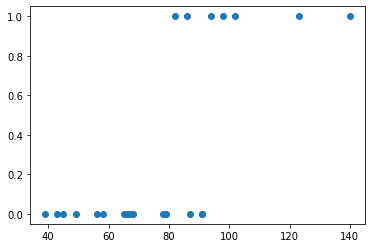

In [3]:
plt.scatter(x=df.iloc[:,0], y=df.iloc[:,1])

# Step 2. Fit data the convenient way

We use sklearn to get a first impression on what our own result should look like

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(df.iloc[:,0].values.reshape(-1, 1), df.iloc[:,1])

In [5]:
print(clf.coef_[0][0])
print(clf.intercept_[0])

0.17737397329283072
-15.775966227457388


We need two formulas to convert between probability and the log of odds (i.e., log odds)

Definition of odds and log odds in case of two possible outcomes (either $p$ or $1 - p$):
$$
\frac{p}{1-p}
$$

$$
log(\frac{p}{1-p})
$$

Calculate $p$ from log odds

$$
p = \frac{e^{log(odds)}}{1 + e^{log(odds)}}
$$

The original toy dateset is `proability of being obese` against `weight` but `clf.coef_[0][0]` and `clf.intercept_[0]` is used to calculate `log odds` from `weight`

In [6]:
log_odds = df.iloc[:,0] * clf.coef_[0][0] + clf.intercept_[0]
log_odds

0    -1.940796
1     1.606683
2    -7.794137
3     0.897187
4     6.041032
5    -4.246658
6    -8.148885
7    -8.858381
8     2.316179
9    -0.344431
10    9.056390
11   -5.843024
12   -5.488276
13   -7.084642
14   -0.521805
15    0.365065
16   -4.069284
17   -3.891910
18   -3.714536
19   -1.763422
20    0.365065
21   -1.231300
Name: weight, dtype: float64

After calculating log odds as predicted by the Logistic Regression model, we need to convert log odds back to probability so that the result can be plotted to the original scatter plot

In [7]:
prob = math.e ** log_odds / (1 + math.e ** log_odds)
prob

0     0.125560
1     0.832950
2     0.000412
3     0.710371
4     0.997627
5     0.014110
6     0.000289
7     0.000142
8     0.910208
9     0.414734
10    0.999883
11    0.002892
12    0.004118
13    0.000837
14    0.372430
15    0.590266
16    0.016802
17    0.019998
18    0.023787
19    0.146362
20    0.590266
21    0.225954
Name: weight, dtype: float64

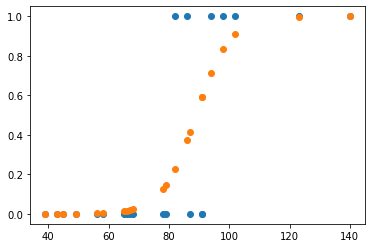

In [8]:
plt.scatter(x=df.iloc[:,0], y=df.iloc[:,1])
plt.scatter(x=df.iloc[:,0], y=prob)
plt.show()